##Load Dataset

In [ ]:
!pip install xgboost
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/income.csv"
data = pd.read_csv(url)

##Data Preprocessing

In [ ]:
data.isnull().sum()

label_encoder = LabelEncoder()

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

data['income'] = label_encoder.fit_transform(data['income'])

X = data.drop('income', axis=1)
y = data['income']

##Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Train Boosting Model (XGBoost)

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:05:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

##Train Bagging Model (Random Forest)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##Evaluasi Model

In [ ]:
xgb_preds = xgb_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Metrics for Boosting Model
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds, average='weighted')  # Use 'weighted' for multiclass
xgb_recall = recall_score(y_test, xgb_preds, average='weighted')  # Use 'weighted' for multiclass
xgb_f1 = f1_score(y_test, xgb_preds, average='weighted')  # Use 'weighted' for multiclass
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr')  # Specify multiclass AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1], pos_label=1)

# Metrics for Bagging Model
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds, average='weighted')  # Use 'weighted' for multiclass
rf_recall = recall_score(y_test, rf_preds, average='weighted')  # Use 'weighted' for multiclass
rf_f1 = f1_score(y_test, rf_preds, average='weighted')  # Use 'weighted' for multiclass
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')  # Specify multiclass AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)

##Plot ROC Curves

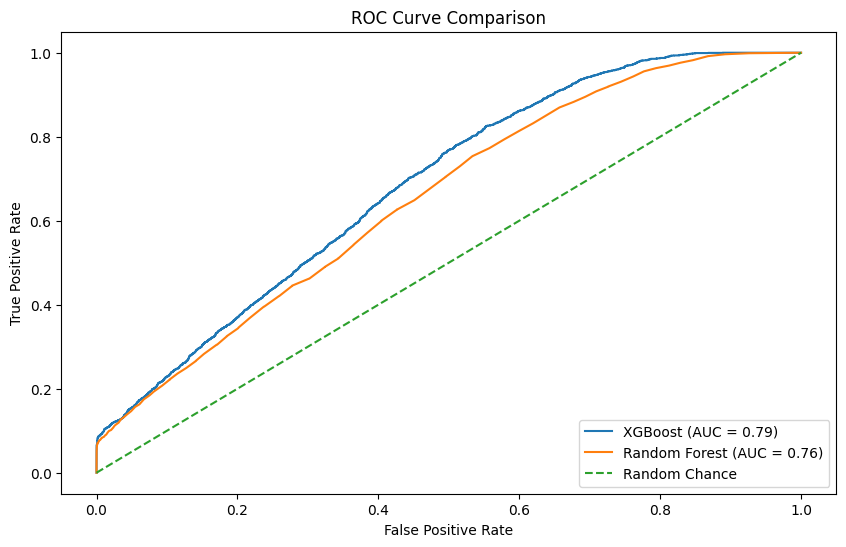

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

##Evaluasi Metriks

In [ ]:
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_auc],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc]
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

      Metric   XGBoost  Random Forest
0   Accuracy  0.598526       0.560037
1  Precision  0.611045       0.516468
2     Recall  0.598526       0.560037
3   F1-Score  0.518822       0.515455
4        AUC  0.788093       0.758190


#**Penjelasan Matematika**
### 1. **Akurasi (Accuracy)**
Akurasi mengukur seberapa banyak prediksi yang benar dibandingkan dengan jumlah total data yang diuji. Dinyatakan dengan persamaan:

$
\text{Accuracy} = \frac{\text{Jumlah Prediksi yang Benar}}{\text{Jumlah Total Data}}
$

### 2. **Presisi (Precision)**
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif yang dilakukan oleh model. Ini dihitung dengan rumus:

$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$

### 3. **Recall (Sensitivitas)**
Recall mengukur seberapa banyak data positif yang berhasil diprediksi dengan benar dibandingkan dengan jumlah total data positif yang sebenarnya. Rumusnya adalah:

$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$

### 4. **F1-Score**
F1-Score adalah rata-rata harmonik antara presisi dan recall, memberikan gambaran yang lebih seimbang tentang kinerja model ketika ada ketidakseimbangan kelas. Dihitung dengan rumus:

$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$

### 5. **Area Under the Curve (AUC)**
AUC adalah ukuran untuk mengevaluasi kemampuan model dalam membedakan antara kelas positif dan negatif. AUC dihitung berdasarkan kurva ROC (Receiver Operating Characteristic). AUC dihitung sebagai luas area di bawah kurva ROC.

### 6. **ROC Curve**
ROC Curve adalah grafik yang menggambarkan trade-off antara true positive rate (TPR) dan false positive rate (FPR) pada berbagai threshold klasifikasi. Rumus untuk menghitung TPR dan FPR adalah:

$
\text{True Positive Rate (TPR)} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$

$
\text{False Positive Rate (FPR)} = \frac{\text{False Positives}}{\text{False Positives + True Negatives}}
$